# OCR Demystified !!

The solution is divided into three parts:
1. Part-1 Exploration and Preprocessing
2. Part-2 Training data and Feature extraction
3. Part-3 Training and Classification<br>

## [ Part-1 ]  Exploration and Preprocessing

### Identified Issues

1. Overlapping of characters
2. Slanting of characters
3. Gaps present in shape
4. Not in in same horizontal line
5. Width of same characters is not same in different images



###  Image Acquisition

In [39]:
#General libraries

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from IPython.display import clear_output

In [40]:
#PIL library

from PIL import Image, ImageChops, ImageDraw, ImageFilter

In [41]:
#skimage library

from skimage import io

In [42]:
# functions for reading and showing images

def readImage(index):
    image=Image.open(os.getcwd()+'/Images/'+str(index)+'.jpg')
    return image

def showImage(image, h=3):
    figure(figsize = (10,h))
    plt.imshow(image)
    plt.show()


Image:  1


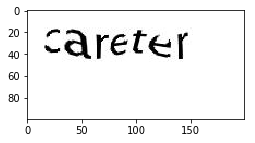

Image:  2


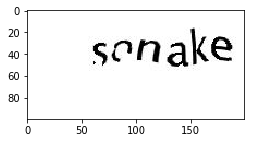

Image:  3


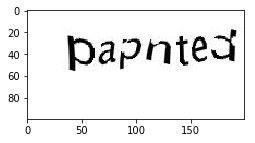

Image:  4


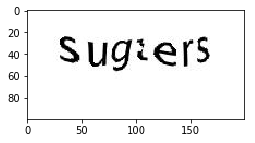

Image:  5


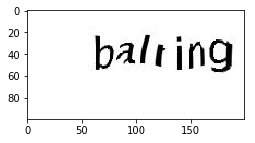

Image:  6


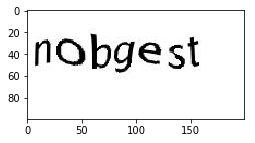

Image:  7


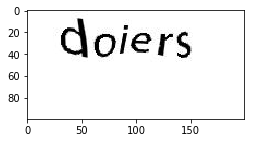

Image:  8


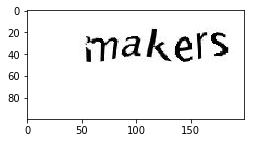

Image:  9


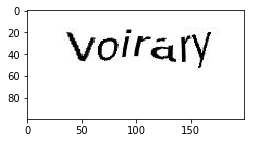

Image:  10


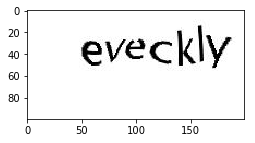

Image:  11


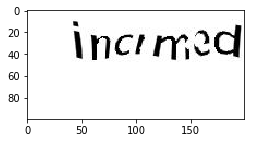

Image:  12


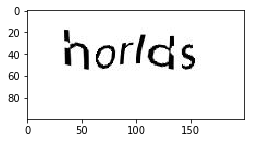

Image:  13


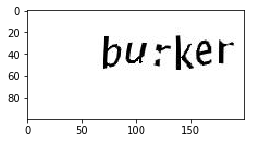

Image:  14


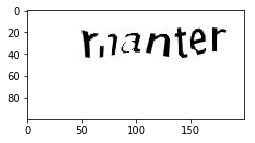

Image:  15


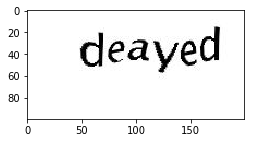

Image:  16


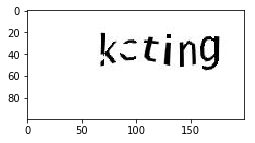

Image:  17


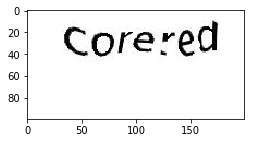

Image:  18


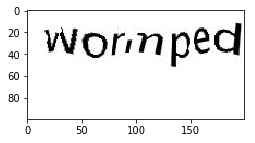

Image:  19


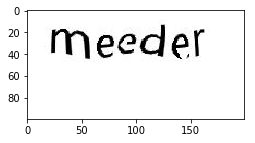

Image:  20


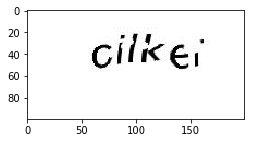

Image:  21


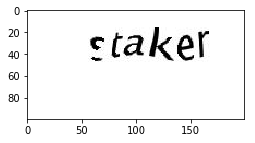

Image:  22


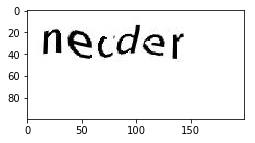

Image:  23


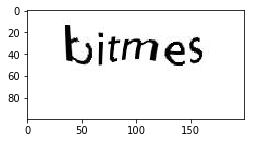

Image:  24


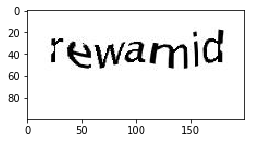

Image:  25


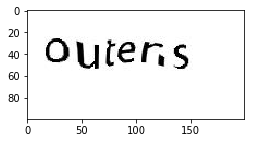

Image:  26


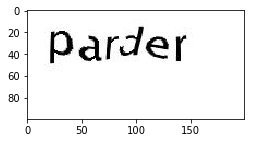

Image:  27


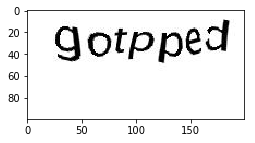

Image:  28


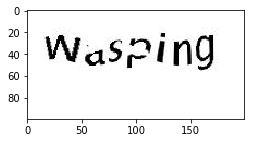

Image:  29


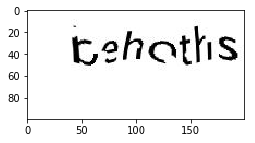

Image:  30


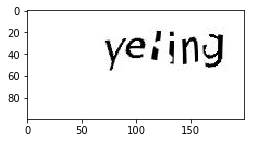

Image:  31


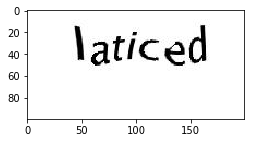

In [43]:
## A glance at Images

images = os.listdir(os.path.join(os.getcwd(), 'Images'))

for i,image in enumerate(images):
    image=Image.open(os.getcwd()+'/Images/'+image)
    print 'Image: ',i+1
    showImage(image,2)
    
    

In [44]:
# Checking if image is Greyscale or not 

image= io.imread(os.getcwd()+'/Images/0.jpg')

if(image.ndim < 3):
    #ndim =2 for RGB image
    print 'The image is Grayscale and the shape of original image :'+ str(image.shape)
else:
    #ndim =3 for RGB image
    print 'The image is RGB and the shape of original image :'+ str(image.shape)


The image is RGB and the shape of original image :(100, 200, 3)


## Preprocessing

-> Converting image into Greyscale <br>
-> Identifying region of interest <br>
-> Cropping the required region <br>
-> Extraction of characters from images - to be used later for generating training data<br>
-> Saving characters on disk
 

### Converting image into Greyscale

Original Image :
(200, 100)


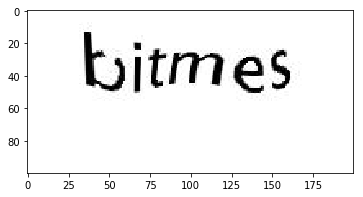

In [45]:
image = readImage(3)
print 'Original Image :\n'+ str(image.size)
showImage(image)


Converted Image :
(200, 100)


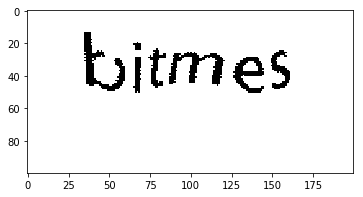

In [46]:
def convertImage(image):
    convertedImage = image.convert('1')
    return convertedImage

convertedImage = convertImage(image)
print 'Converted Image :\n'+ str(image.size)
showImage(convertedImage)

### Making bounding Box around the region of interest

In [47]:
def boundingBox(image):
    pixelData = image.load()
    width, height = image.size

    #Finding coordinates of  bounding rectangle
    x_min=width
    y_min=height
    x_max=0
    y_max=0

    for i in range(width):
        for j in range(height):
    #         print pixelData[i,j]
            if (pixelData[i,j][0]==0):
                # For getting the corners of bounding rectangle
                if(i<x_min):
                    x_min=i
                if(j<y_min):
                    y_min=j
                if(i>x_max):
                    x_max=i
                if(j>y_max):
                    y_max=j
    xy = [x_min, y_min, x_max, y_max]
    return xy


x_min, y_min, x_max, y_max = boundingBox(image)
print 'x_min: %d, y_min: %d, x_max:%d, y_max:%d' %(x_min, y_min, x_max, y_max)


x_min: 35, y_min: 14, x_max:160, y_max:50


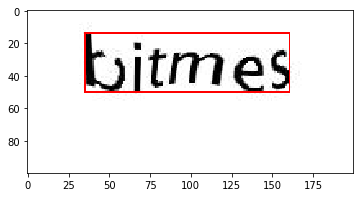

In [48]:
imageWithRectangle = image.copy()
xy = boundingBox(imageWithRectangle)
draw = ImageDraw.Draw( imageWithRectangle )
draw.rectangle(xy, fill=None, outline=(255,0,0))
showImage (imageWithRectangle)

### Cropping the image to extract main region

Shape of cropped image:  (125, 36)


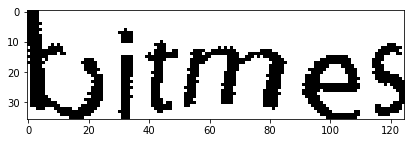

In [49]:
croppedImage = convertedImage.copy()
croppedImage = croppedImage.crop(xy)
print 'Shape of cropped image: ',croppedImage.size # Challenge: should be same for all cropped images !!!
showImage(croppedImage,2)

### Extracting individual characters

In [50]:
# function for showing gaps in between characters

def showGaps(image):    
    separatorLine = image.copy()
    width,height = separatorLine.size
    pixels = np.asarray(separatorLine).transpose()
    draw = ImageDraw.Draw(separatorLine)

    for i in range(width):
        if (np.mean(pixels[i])!=1.0):
            draw.line((i,0,i,height), fill=0)
    
    showImage(separatorLine,2)
   

The white lines represent the separators


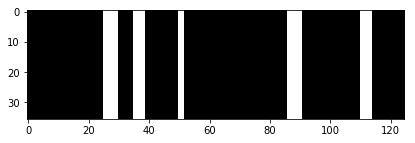

In [51]:
print 'The white lines represent the separators'
showGaps(croppedImage)

In [52]:
#Croping an image given some coordinates
def crop(image, xy):
    image = image.crop(xy)
    return image
    
    
#lower most and upper most coordinates of any character
def getCharacterHeight(image, start, end):
    pixelData = image.load()
    y_min = image.size[1]
    y_max = 0
    i = start
    while( i < end):
        for j in range(image.size[1]):
            if (pixelData[i,j]==0):
                if(j<y_min):
                    y_min=j
                if(j>y_max):
                    y_max=j
        i+=1
    return (y_min, y_max)


#extracting character by cropping along identified coordinates
def extract(image):   
    
    indexes = []
    start = 0 # this is the left-most x-coordinate of any character
    
    separatorLine = image.copy()
    width,height = separatorLine.size
    pixels = np.asarray(separatorLine).transpose()
    draw = ImageDraw.Draw(separatorLine)

    i=0
    while i < width:
        if (np.mean((pixels[i]))==1.0):
            y_min, y_max = getCharacterHeight(image, start, i)
            indexes.append((start,y_min,i,y_max))
            start=i

            while(np.mean(pixels[i])==1.0):
                i+=1
                start+=1            
        else:
            i+=1
    
    y_min, y_max = getCharacterHeight(image, start, i)
    indexes.append((start,y_min,width-1,y_max))
    return indexes



Following are the extracted characters


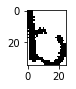

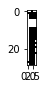

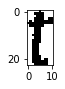

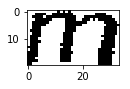

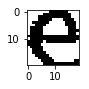

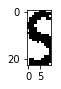

In [53]:
#Sample extraction of characters
indexes = extract(croppedImage)
print "Following are the extracted characters"
for i in range(len(indexes)):
    image = crop(croppedImage, indexes[i])
    showImage(image,1)

### Saving characters as images on disk with their filenames as their lables

Image No:  1


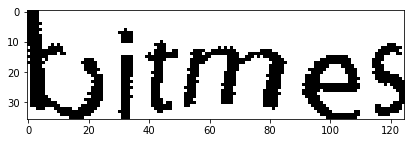

Enter the word shown in image : bitmes
Saving image for b
Saving image for i
Saving image for t
Saving image for m
Saving image for e
Saving image for s
['Successfully saved 6 characters', 1, 'bitmes']
Stored 'max_values' (list)


In [54]:
#checks if the characters are correctly extracted, saves them if so
def checkAndSave(image, indexes, imageCount, outDir):
    
    characterMap = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10, 'k':11, 'l':12, 'm':13,
                   'n':14, 'o':15, 'p':16, 'q':17, 'r':18, 's':19, 't':20, 'u':21, 'v':22,'w':23,'x':24,'y':25,
                   'z':26 }
    
    global max_width, max_height
    max_width = 0
    max_height = 0
    
    print 'Image No: ',(imageCount+1)
    showImage(image,2)
    imageWord = raw_input("Enter the word shown in image : ")
    
    if(len(indexes)!=len(imageWord)):
        result = "ERROR : Extracted characters are not same as Word length "
        flag = 0
    else :
        for i,letter in enumerate(imageWord):
            image = crop(croppedImage, indexes[i])

            width, height = image.size
            if(width > max_width):
                max_width = width
            if(height > max_height):
                max_height = height

            #The imageName should be a number
            print "Saving image for "+ imageWord[i]
            image.save(outDir+str(imageCount)+'_'+str(i)+'_'+str(characterMap[letter])+'.png')
            
        result = 'Successfully saved %d characters' %(len(imageWord))
        flag = 1
    
    return [result, flag, imageWord]

indexes = extract(croppedImage)
outDir = os.getcwd()+'/characters/'
max_width = 0
max_height = 0 
value = checkAndSave(croppedImage, indexes,0, outDir)
print value
            
# Saving maximum width and height required for final training images
max_values = [max_width, max_height]
%store max_values 
        
    

## Preprocessing pipeline

Below is the complete pipeline : From image reading to saving of extracted characters on disk

In [57]:
# task = "train"
task = "test"

if task == "train":
    images = os.listdir(os.path.join(os.getcwd(), 'Images'))
    inDir = os.getcwd()+'/Images/'
    outDir = os.getcwd()+'/characters/'
else:
    images = os.listdir(os.path.join(os.getcwd(), 'test_image'))
    inDir = os.getcwd()+'/test_image/'
    outDir = os.getcwd()+'/test_characters/'

# global max_width, max_height
max_height = 0
max_width = 0

missingCount = 0
notExtracted=[]

for imageCount,image in enumerate(images):
    image=Image.open(inDir+image)

    #Step1: converting into black and white image
    convertedImage = convertImage(image)

    #Step2: getting coordinates of bounding box
    xy = boundingBox (image)

    #Step3: cropping bounding box region
    croppedImage = crop(convertedImage, xy)

    #Step4: extracting and saving individual characters
    indexes = extract(croppedImage)
    result = checkAndSave(croppedImage, indexes, imageCount, outDir)


    clear_output()
    if result[1] == 0:
        notExtracted.append(result[2])
    else:
        print result[0]

    print 'Total incorrectly extracted words : ', len(notExtracted)

print "Following words were not extracted correctly"   
for items in notExtracted:
    print items

#Saving maximum width and height required for final training images
if(task == "train"):
    max_values = [max_width, max_height]
    %store max_values
    


Successfully saved 6 characters
Total incorrectly extracted words :  0
Following words were not extracted correctly
